In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
s11 = pd.read_csv('season_11.csv')
s11 = s11.drop('Notes', axis=1)

In [ ]:
KP = round(((s11['Kills'] + s11['Assists']) / s11['Total Kills']), 3)

s11['KP'] = KP
s11 = s11[['Date', 'Patch', 'Champion', 'Skin', 'Role', 'Lanemate', 'Kills',
           'Deaths', 'Assists', 'KDA', 'KP', 'Total Kills', 'Lane Oppenent', 
           'Lane Oppenent_2', 'Mythic' ,'Damage', 'Gold', 'Time (minutes)', 
           'Farm', 'Side', 'Duo', 'Outcome']]
s11.head()

,Date,Patch,Champion,Skin,Role,Lanemate,Kills,Deaths,Assists,KDA,KP,Total Kills,Lane Oppenent,Lane Oppenent_2,Mythic,Damage,Gold,Time (minutes),Farm,Side,Duo,Outcome
0,1/10/2021,11.1,Leona,Project,Support,Kai'sa,2,4.0,18,5.00,0.513,39,Morgana,Jhin,Locket,7912,8743,32,24,Blue,No,1
1,1/11/2021,11.1,Leona,Solar Eclipse,Support,Varus,4,10.0,17,2.10,0.583,36,Blitzcrank,Ashe,Sunfire,12005,9875,38,51,Blue,No,0
2,1/12/2021,11.1,Galio,Hextech,Support,Miss Fortune,1,8.0,19,2.50,0.476,42,Pantheon,Ashe,Locket,7704,8681,32,54,Red,Yes,1
3,1/12/2021,11.1,Leona,Lunar Eclipse,Support,Ashe,2,1.0,9,11.00,0.500,22,Pyke,Samira,Locket,2694,5424,17,32,Red,Yes,1
4,1/13/2021,11.1,Leona,Mecha Kingdom,Support,Ezreal,2,4.0,11,3.25,0.382,34,Lux,Draven,Sunfire,7001,8537,28,55,Red,No,1


In [ ]:
sns.set_style('dark')

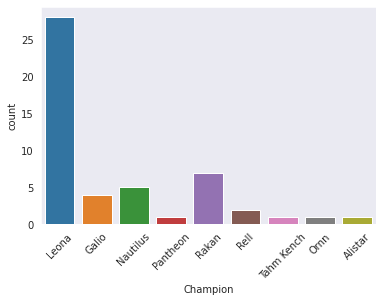

In [ ]:
sns.countplot(x=s11['Champion'])
plt.xticks(rotation=45)
plt.show()

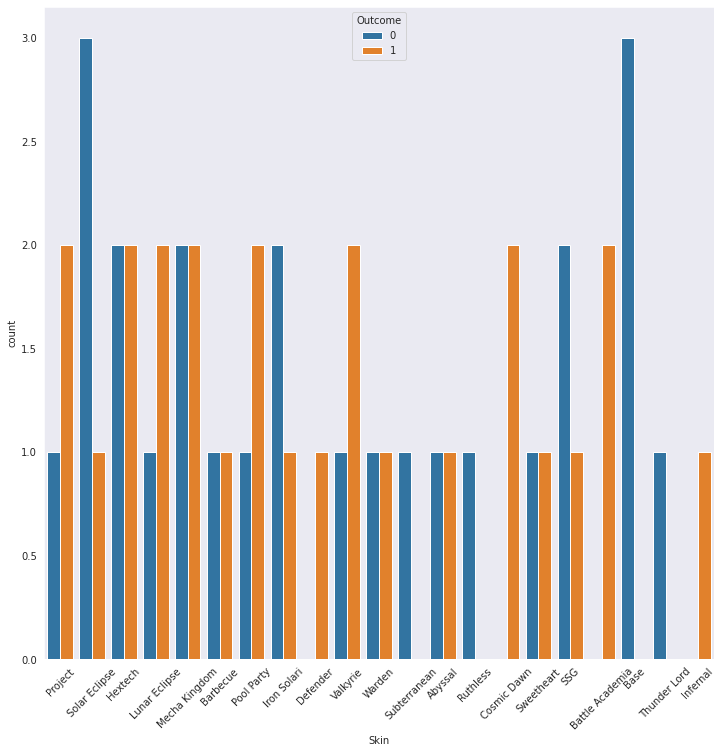

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=s11['Skin'], hue=s11['Outcome'])
plt.xticks(rotation = 45)
plt.show()

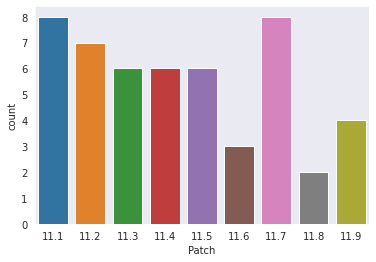

In [ ]:
sns.countplot(x=s11['Patch'])
plt.show()

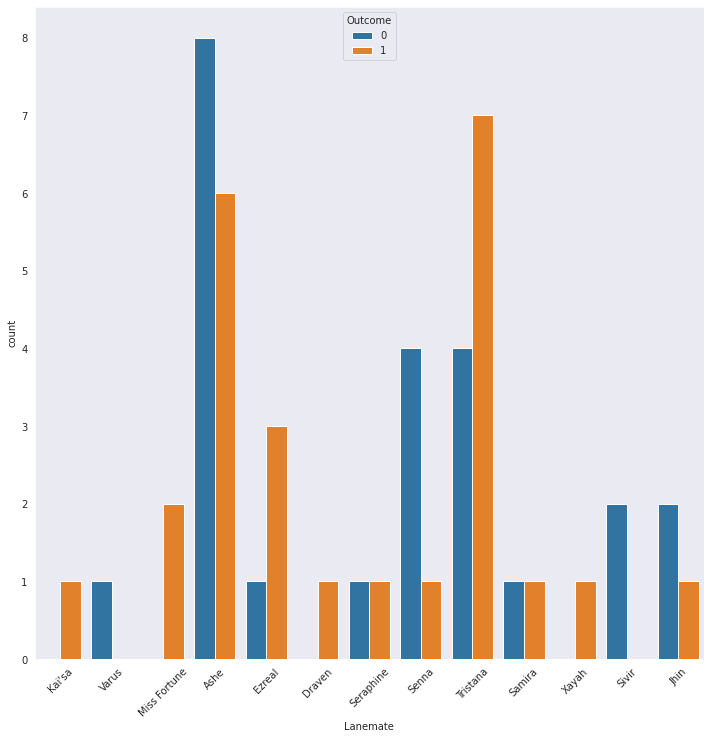

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=s11['Lanemate'], hue=s11['Outcome'])
plt.xticks(rotation = 45)
plt.show()

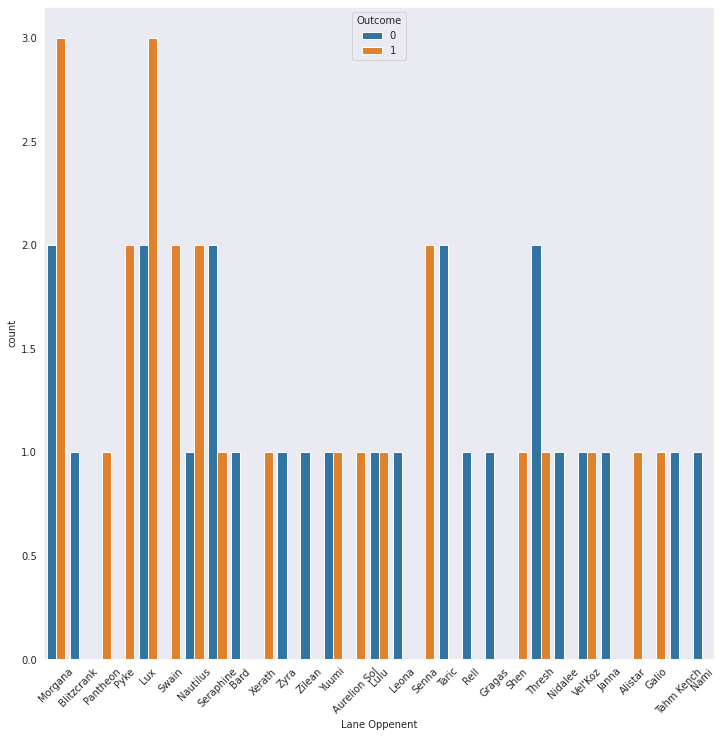

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=s11['Lane Oppenent'], hue=s11['Outcome'])
plt.xticks(rotation=45)
plt.show()

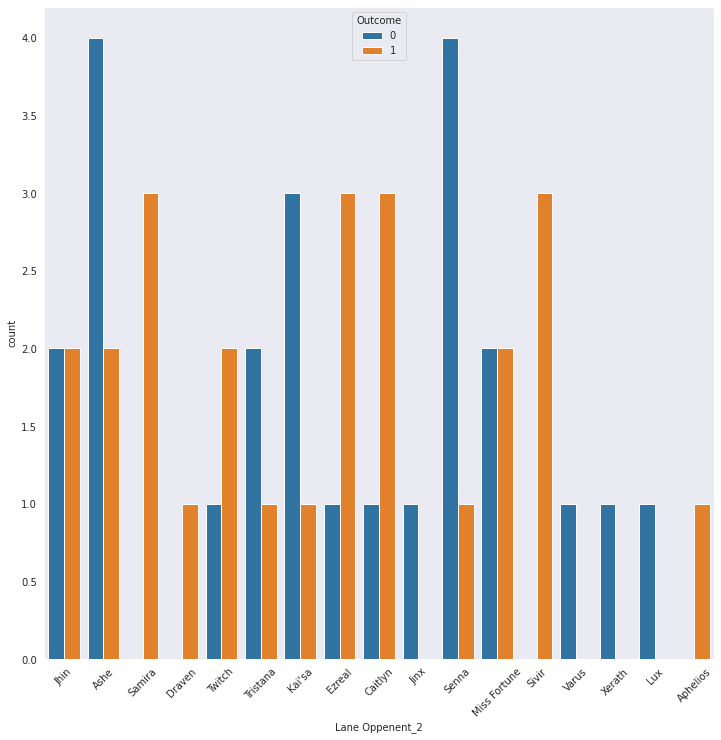

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=s11['Lane Oppenent_2'], hue=s11['Outcome'])
plt.xticks(rotation=45)
plt.show()

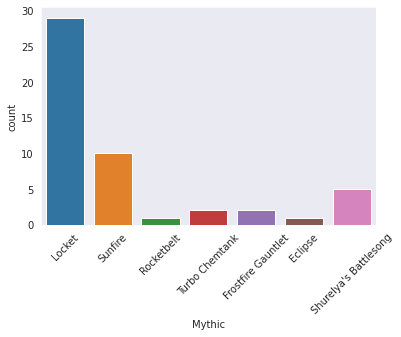

In [ ]:
sns.countplot(x=s11['Mythic'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
s11.Outcome.replace({0: 'Loss', 1:'Victory'}, inplace=True)

In [ ]:
s11 = s11.rename(columns = {'Time (minutes)': 'Time'})

print(s11.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             50 non-null     object 
 1   Patch            50 non-null     float64
 2   Champion         50 non-null     object 
 3   Skin             50 non-null     object 
 4   Role             50 non-null     object 
 5   Lanemate         49 non-null     object 
 6   Kills            50 non-null     int64  
 7   Deaths           50 non-null     float64
 8   Assists          50 non-null     int64  
 9   KDA              50 non-null     float64
 10  KP               50 non-null     float64
 11  Total Kills      50 non-null     int64  
 12  Lane Oppenent    50 non-null     object 
 13  Lane Oppenent_2  49 non-null     object 
 14  Mythic           50 non-null     object 
 15  Damage           50 non-null     int64  
 16  Gold             50 non-null     int64  
 17  Time             5

In [ ]:
def CountFrequency(df):
  freq = {}
  for item in df:
    if (item in freq):
      freq[item] = freq[item] + 1
    else:
      freq[item] = 1
  for key, value in freq.items():
    print(key, value)
  return freq

champlist = (CountFrequency(s11['Champion']))
labels = []
sizes = []
for x,y in champlist.items():
  labels.append(x)
  sizes.append(y)

Leona 28
Galio 4
Nautilus 5
Pantheon 1
Rakan 7
Rell 2
Tahm Kench 1
Ornn 1
Alistar 1


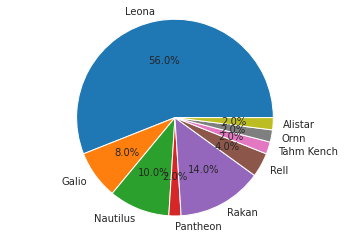

In [ ]:
plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

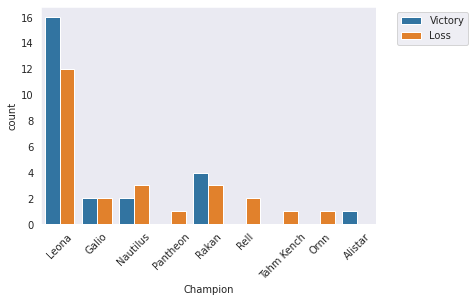

In [ ]:
sns.countplot(x= s11['Champion'], hue=s11['Outcome'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

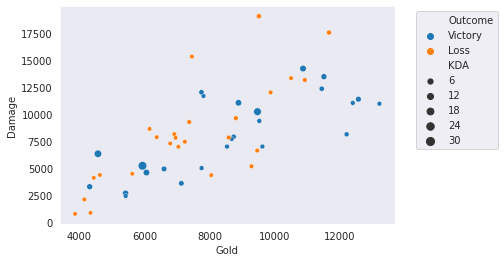

In [ ]:
sns.scatterplot(data=s11, x='Gold', y='Damage', hue='Outcome', size=s11['KDA'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

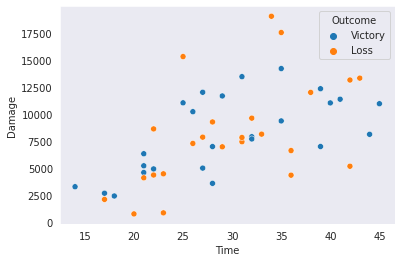

In [ ]:
sns.scatterplot(data=s11, x='Time', y='Damage', hue='Outcome')
plt.show()

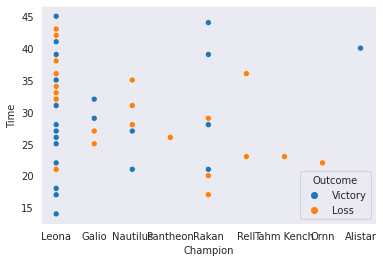

In [ ]:
sns.scatterplot(data=s11, x='Champion', y='Time', hue='Outcome')
plt.show()

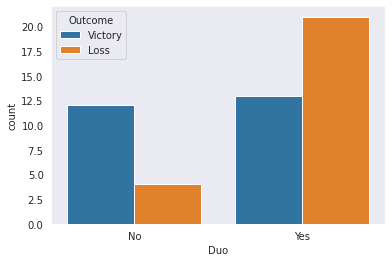

In [ ]:
sns.countplot(x=s11['Duo'], hue=s11['Outcome'])
plt.show()

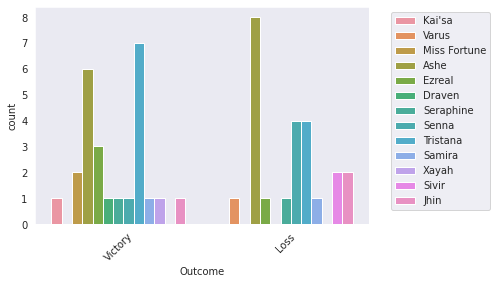

In [ ]:
sns.countplot(x=s11['Outcome'], hue=s11['Lanemate'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 45)
plt.show()

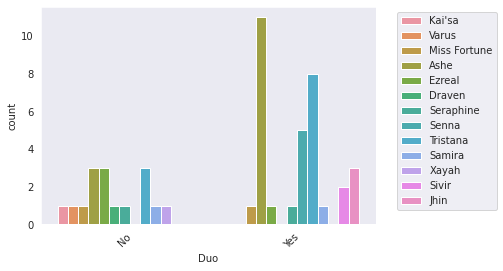

In [ ]:
sns.countplot(x=s11['Duo'], hue=s11['Lanemate'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
y = s11['Outcome']
X= s11.drop(labels=['Outcome', 'Date'], axis=1)
X = pd.get_dummies(X)
X.head()

,Patch,Kills,Deaths,Assists,KDA,KP,Total Kills,Damage,Gold,Time,Farm,Champion_Alistar,Champion_Galio,Champion_Leona,Champion_Nautilus,Champion_Ornn,Champion_Pantheon,Champion_Rakan,Champion_Rell,Champion_Tahm Kench,Skin_Abyssal,Skin_Barbecue,Skin_Base,Skin_Battle Academia,Skin_Cosmic Dawn,Skin_Defender,Skin_Hextech,Skin_Infernal,Skin_Iron Solari,Skin_Lunar Eclipse,Skin_Mecha Kingdom,Skin_Pool Party,Skin_Project,Skin_Ruthless,Skin_SSG,Skin_Solar Eclipse,Skin_Subterranean,Skin_Sweetheart,Skin_Thunder Lord,Skin_Valkyrie,...,Lane Oppenent_Senna,Lane Oppenent_Seraphine,Lane Oppenent_Shen,Lane Oppenent_Swain,Lane Oppenent_Tahm Kench,Lane Oppenent_Taric,Lane Oppenent_Thresh,Lane Oppenent_Vel'Koz,Lane Oppenent_Xerath,Lane Oppenent_Yuumi,Lane Oppenent_Zilean,Lane Oppenent_Zyra,Lane Oppenent_2_Aphelios,Lane Oppenent_2_Ashe,Lane Oppenent_2_Caitlyn,Lane Oppenent_2_Draven,Lane Oppenent_2_Ezreal,Lane Oppenent_2_Jhin,Lane Oppenent_2_Jinx,Lane Oppenent_2_Kai'sa,Lane Oppenent_2_Lux,Lane Oppenent_2_Miss Fortune,Lane Oppenent_2_Samira,Lane Oppenent_2_Senna,Lane Oppenent_2_Sivir,Lane Oppenent_2_Tristana,Lane Oppenent_2_Twitch,Lane Oppenent_2_Varus,Lane Oppenent_2_Xerath,Mythic_Eclipse,Mythic_Frostfire Gauntlet,Mythic_Locket,Mythic_Rocketbelt,Mythic_Shurelya's Battlesong,Mythic_Sunfire,Mythic_Turbo Chemtank,Side_Blue,Side_Red,Duo_No,Duo_Yes
0,11.1,2,4.0,18,5.00,0.513,39,7912,8743,32,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,11.1,4,10.0,17,2.10,0.583,36,12005,9875,38,51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
2,11.1,1,8.0,19,2.50,0.476,42,7704,8681,32,54,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3,11.1,2,1.0,9,11.00,0.500,22,2694,5424,17,32,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,11.1,2,4.0,11,3.25,0.382,34,7001,8537,28,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=137)

models = {
    'RF': RandomForestClassifier(n_estimators=100, criterion='entropy'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': svm.SVC(),
    'NB': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators = 100, max_depth=4, learning_rate=0.05, criterion='mae')
}


for name, model in models.items():
    model = model.fit(X_train, y_train)
    model_predict= model.predict(X_test)
    print('Model : {} Accuracy : {}'.format(name, accuracy_score(y_test, model_predict)))

Model : RF Accuracy : 0.8666666666666667
Model : KNN Accuracy : 0.6
Model : SVM Accuracy : 0.4
Model : NB Accuracy : 0.5333333333333333
Model : Gradient Boosting Accuracy : 0.8666666666666667


In [ ]:
duo_df = s11[s11['Duo'] == 'Yes']
duo_df.reset_index(inplace=True)
duo_df.head()

,index,Date,Patch,Champion,Skin,Role,Lanemate,Kills,Deaths,Assists,KDA,KP,Total Kills,Lane Oppenent,Lane Oppenent_2,Mythic,Damage,Gold,Time,Farm,Side,Duo,Outcome
0,2,1/12/2021,11.1,Galio,Hextech,Support,Miss Fortune,1,8.0,19,2.50,0.476,42,Pantheon,Ashe,Locket,7704,8681,32,54,Red,Yes,Victory
1,3,1/12/2021,11.1,Leona,Lunar Eclipse,Support,Ashe,2,1.0,9,11.00,0.500,22,Pyke,Samira,Locket,2694,5424,17,32,Red,Yes,Victory
2,5,1/20/2021,11.1,Leona,Barbecue,Support,Ashe,4,2.0,23,13.50,0.614,44,Swain,Jhin,Sunfire,11042,8890,25,34,Blue,Yes,Victory
3,9,1/27/2021,11.2,Leona,Mecha Kingdom,Support,Seraphine,4,5.0,18,4.40,0.629,35,Bard,Ezreal,Sunfire,19039,9516,34,45,Red,Yes,Loss
4,10,1/28/2021,11.2,Leona,Defender,Support,Ashe,2,4.0,11,3.25,0.325,40,Xerath,Samira,Locket,5013,7758,27,31,Red,Yes,Victory


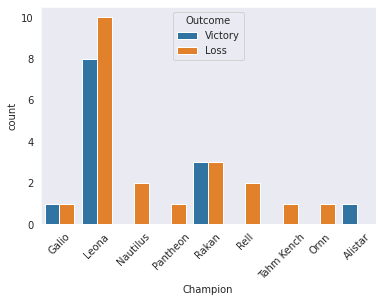

In [ ]:
sns.countplot(x=duo_df['Champion'], hue=duo_df['Outcome'])
plt.xticks(rotation = 45)
plt.show()

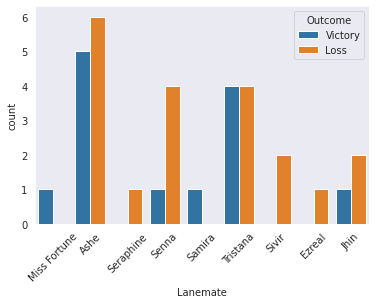

In [ ]:
sns.countplot(x=duo_df['Lanemate'], hue=duo_df['Outcome'])
plt.xticks(rotation =45)
plt.show()

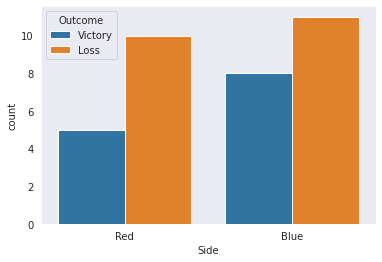

In [ ]:
sns.countplot(x=duo_df['Side'], hue=duo_df['Outcome'])
plt.show()

In [ ]:
cat_col = duo_df[['Skin', 'Lanemate', 'Lane Oppenent', 'Lane Oppenent_2', 
                  'Mythic', 'Side', 'Outcome']]
cont_col = duo_df[['KDA', 'Kills', 'Deaths', 'Assists', 'Damage', 'Time', 'KP', 
                  'Gold', 'Farm']]

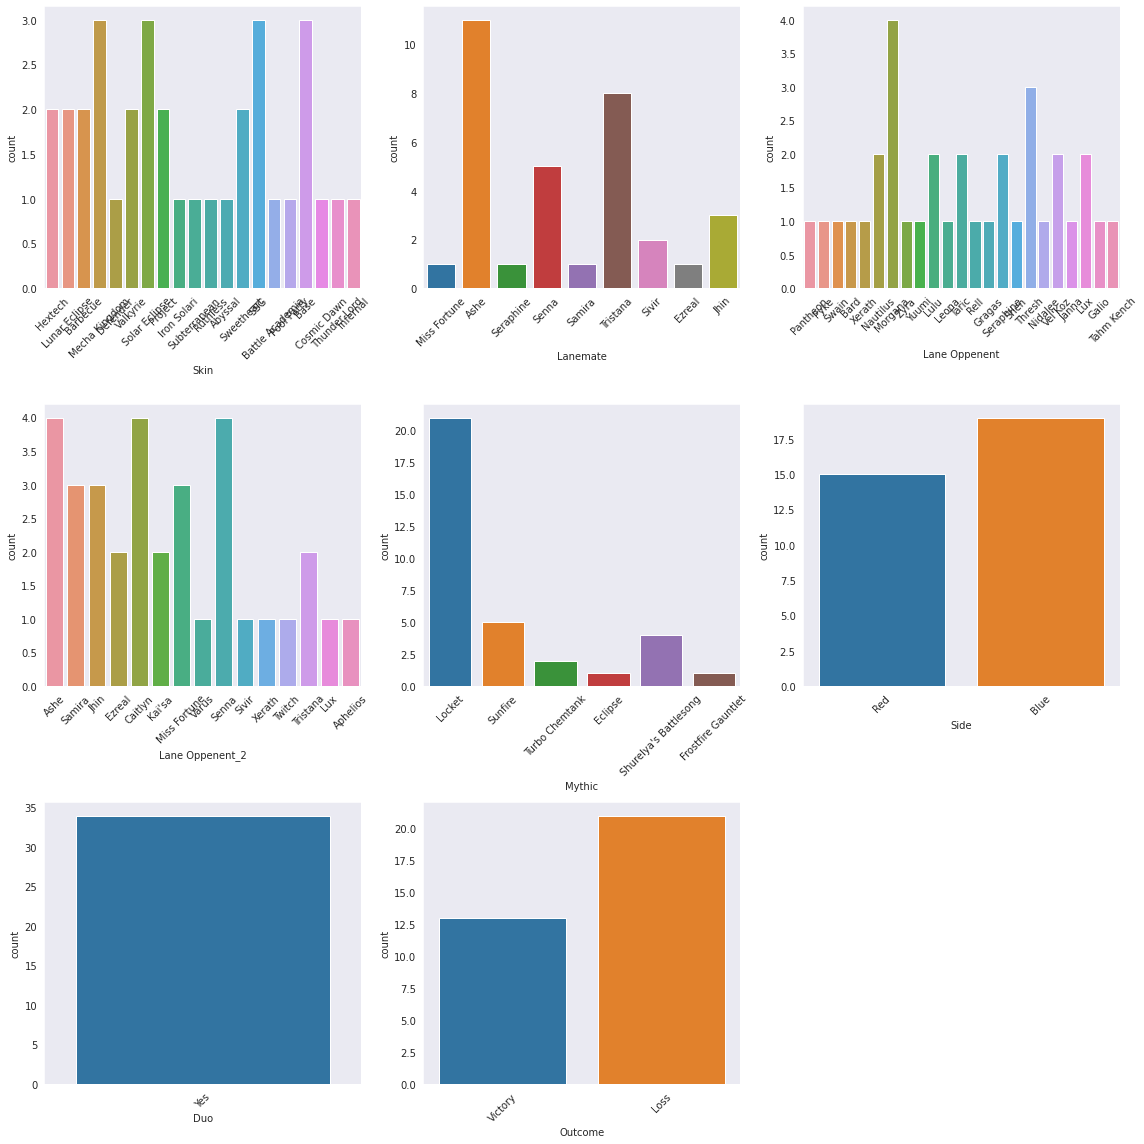

In [ ]:
i = 1
plt.figure(figsize=(16, 16))
for cat in cat_col:
  plt.subplot(3,3,i)
  sns.countplot(x=cat, data=duo_df)
  plt.xticks(rotation = 45)
  i = i + 1
  plt.tight_layout()

plt.show()

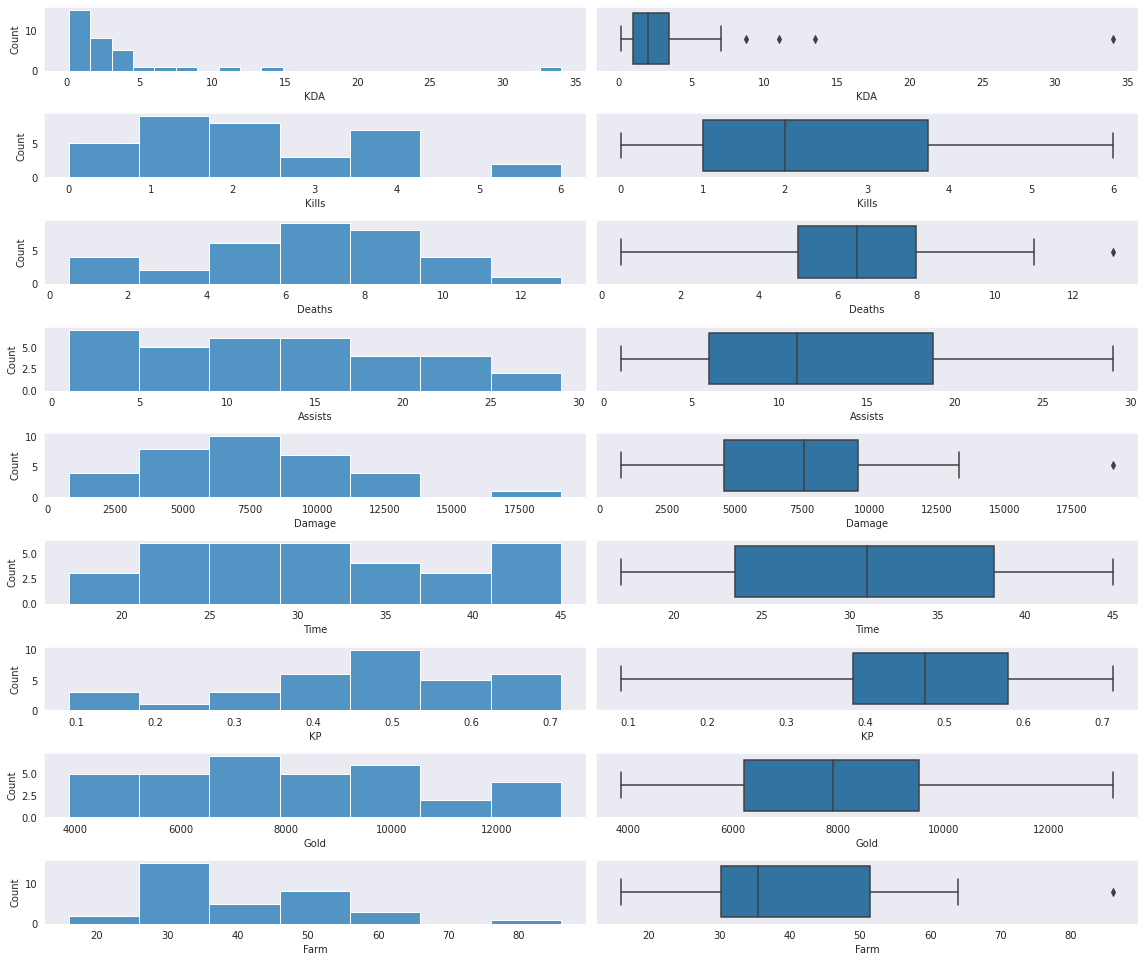

In [ ]:
i = 1
plt.figure(figsize=(16,16))
for cont in cont_col:
  plt.subplot(11,2, i)
  sns.histplot(duo_df[cont])
  i = i + 1
  
  plt.subplot(11,2,i)
  sns.boxplot(x=duo_df[cont])
  i = i + 1
  plt.tight_layout()

plt.show()

In [ ]:
trist_df = s11[s11['Lanemate'] =='Tristana']
trist_df.reset_index(inplace = True)
trist_df.head()

,index,Date,Patch,Champion,Skin,Role,Lanemate,Kills,Deaths,Assists,KDA,KP,Total Kills,Lane Oppenent,Lane Oppenent_2,Mythic,Damage,Gold,Time,Farm,Side,Duo,Outcome
0,15,2/3/2021,11.3,Leona,Iron Solari,Support,Tristana,1,1.0,9,10.0,0.769,13,Swain,Senna,Sunfire,3294,4322,14,22,Red,No,Victory
1,19,2/16/2021,11.3,Galio,Hextech,Support,Tristana,2,8.0,6,1.0,0.533,15,Yuumi,Caitlyn,Locket,7872,6381,27,34,Blue,Yes,Loss
2,21,2/25/2021,11.4,Nautilus,Warden,Support,Tristana,2,0.5,5,14.0,0.179,39,Aurelion Sol,Sivir,Locket,4604,6065,21,56,Blue,No,Victory
3,30,3/11/2021,11.5,Rakan,Sweetheart,Support,Tristana,1,1.0,6,7.0,0.250,28,Seraphine,Sivir,Shurelya's Battlesong,3604,7136,28,26,Blue,Yes,Victory
4,31,3/11/2021,11.5,Rakan,SSG,Support,Tristana,1,10.0,9,1.0,0.400,25,Taric,Senna,Shurelya's Battlesong,6979,7045,29,16,Blue,Yes,Loss


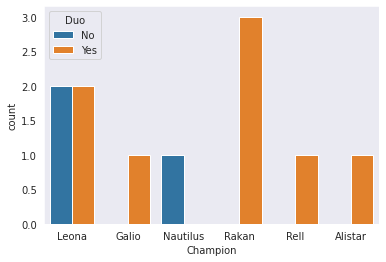

In [ ]:
sns.countplot(x=trist_df['Champion'], hue=trist_df['Duo'])
plt.show()

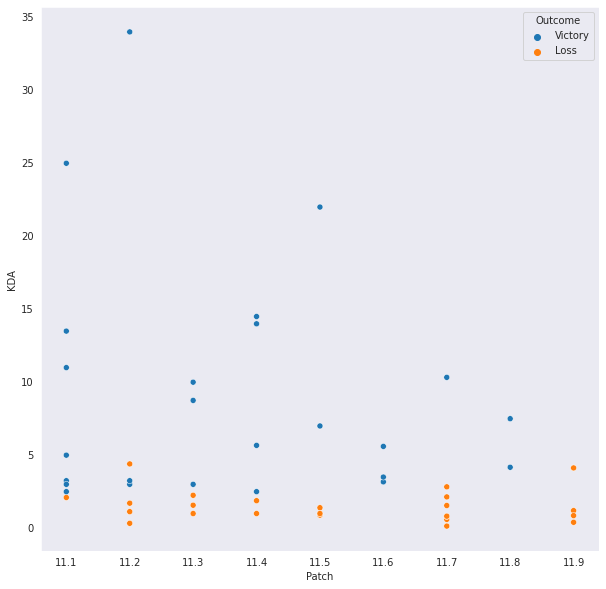

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=s11['Patch'], y=s11['KDA'], hue=s11['Outcome'])
plt.show()

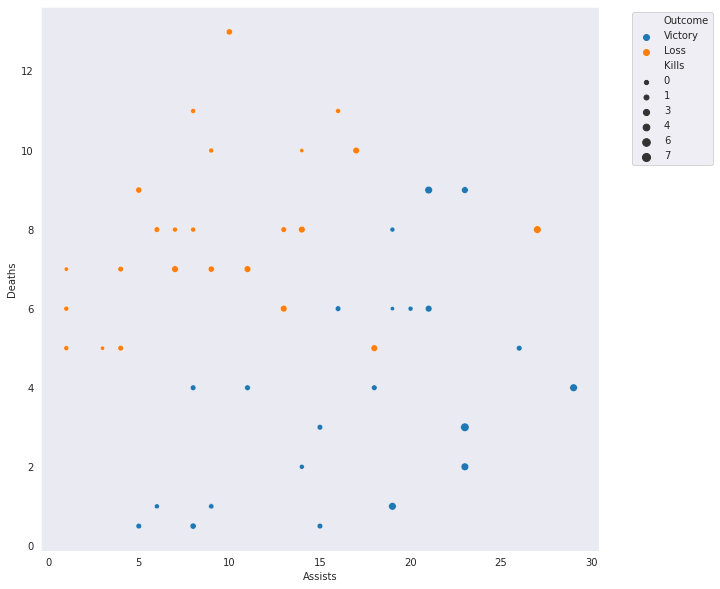

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=s11['Assists'], y=s11['Deaths'], hue=s11['Outcome'], size=s11['Kills'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

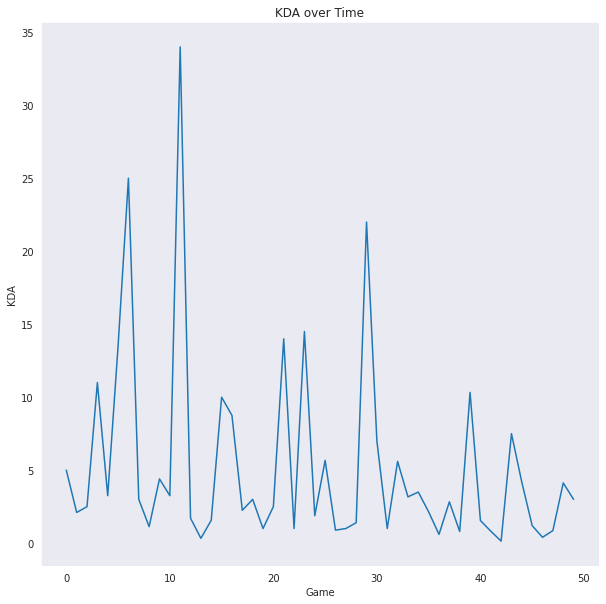

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.lineplot(x = s11.index, y = s11['KDA'])
ax.set(xlabel='Game', title='KDA over Time')
plt.show()

<function matplotlib.pyplot.show>

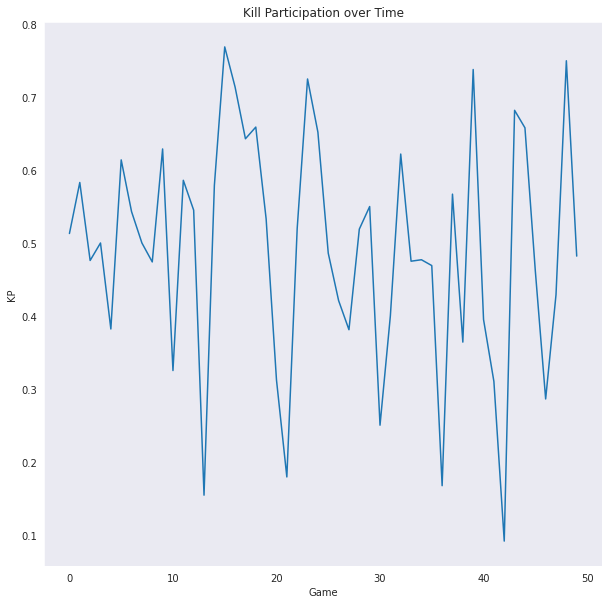

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.lineplot(x=s11.index, y = s11['KP'])
ax.set(xlabel='Game', title='Kill Participation over Time')
plt.show

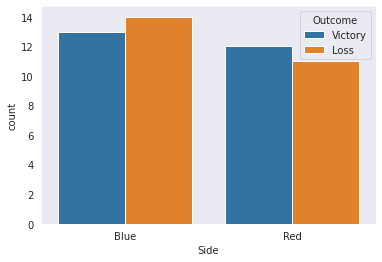

In [ ]:
sns.countplot(x=s11['Side'], hue=s11['Outcome'])
plt.show()

In [ ]:
leo_df = s11[s11['Champion']=='Leona']
leo_df = leo_df.drop('Date', axis=1)
leo_df = leo_df.drop('Champion', axis=1)
leo_df.head()

,Patch,Skin,Role,Lanemate,Kills,Deaths,Assists,KDA,KP,Total Kills,Lane Oppenent,Lane Oppenent_2,Mythic,Damage,Gold,Time,Farm,Side,Duo,Outcome
0,11.1,Project,Support,Kai'sa,2,4.0,18,5.00,0.513,39,Morgana,Jhin,Locket,7912,8743,32,24,Blue,No,Victory
1,11.1,Solar Eclipse,Support,Varus,4,10.0,17,2.10,0.583,36,Blitzcrank,Ashe,Sunfire,12005,9875,38,51,Blue,No,Loss
3,11.1,Lunar Eclipse,Support,Ashe,2,1.0,9,11.00,0.500,22,Pyke,Samira,Locket,2694,5424,17,32,Red,Yes,Victory
4,11.1,Mecha Kingdom,Support,Ezreal,2,4.0,11,3.25,0.382,34,Lux,Draven,Sunfire,7001,8537,28,55,Red,No,Victory
5,11.1,Barbecue,Support,Ashe,4,2.0,23,13.50,0.614,44,Swain,Jhin,Sunfire,11042,8890,25,34,Blue,Yes,Victory


In [ ]:
outcome_leo = (CountFrequency(leo_df['Outcome']))
lanemate_leo = (CountFrequency(leo_df['Lanemate']))
duo_leo = (CountFrequency(leo_df['Duo']))

Victory 16
Loss 12
Kai'sa 1
Varus 1
Ashe 11
Ezreal 2
Seraphine 1
Senna 2
Tristana 4
Samira 1
Xayah 1
Sivir 1
Jhin 2
Miss Fortune 1
No 10
Yes 18


In [ ]:
sns.countplot(x=leo_df['Outcome'], hue=leo_df['Lanemate'])
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

NameError: ignored

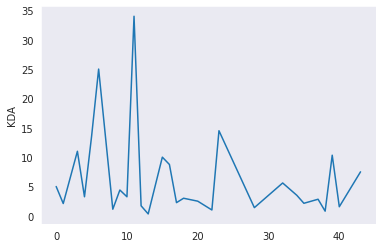

In [ ]:
sns.lineplot(x=leo_df.index, y=leo_df['KDA'])
plt.show()

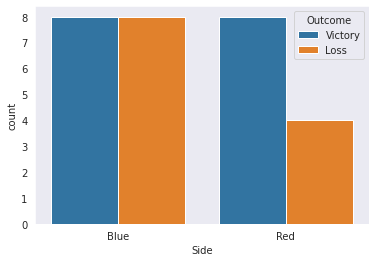

In [ ]:
sns.countplot(x=leo_df['Side'], hue=leo_df['Outcome'])
plt.show()

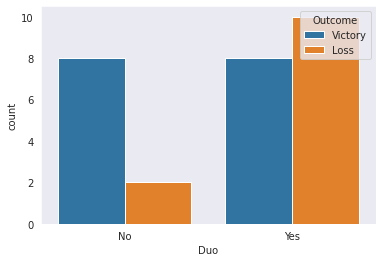

In [ ]:
sns.countplot(x=leo_df['Duo'], hue=leo_df['Outcome'])
plt.show()

In [ ]:
cat_col = leo_df[['Skin', 'Lanemate', 'Lane Oppenent', 'Lane Oppenent_2', 
                  'Mythic', 'Side', 'Duo', 'Outcome']]
cont_col = leo_df[['KDA', 'Kills', 'Deaths', 'Assists', 'Damage', 'Time', 'KP', 
                  'Gold', 'Farm']]

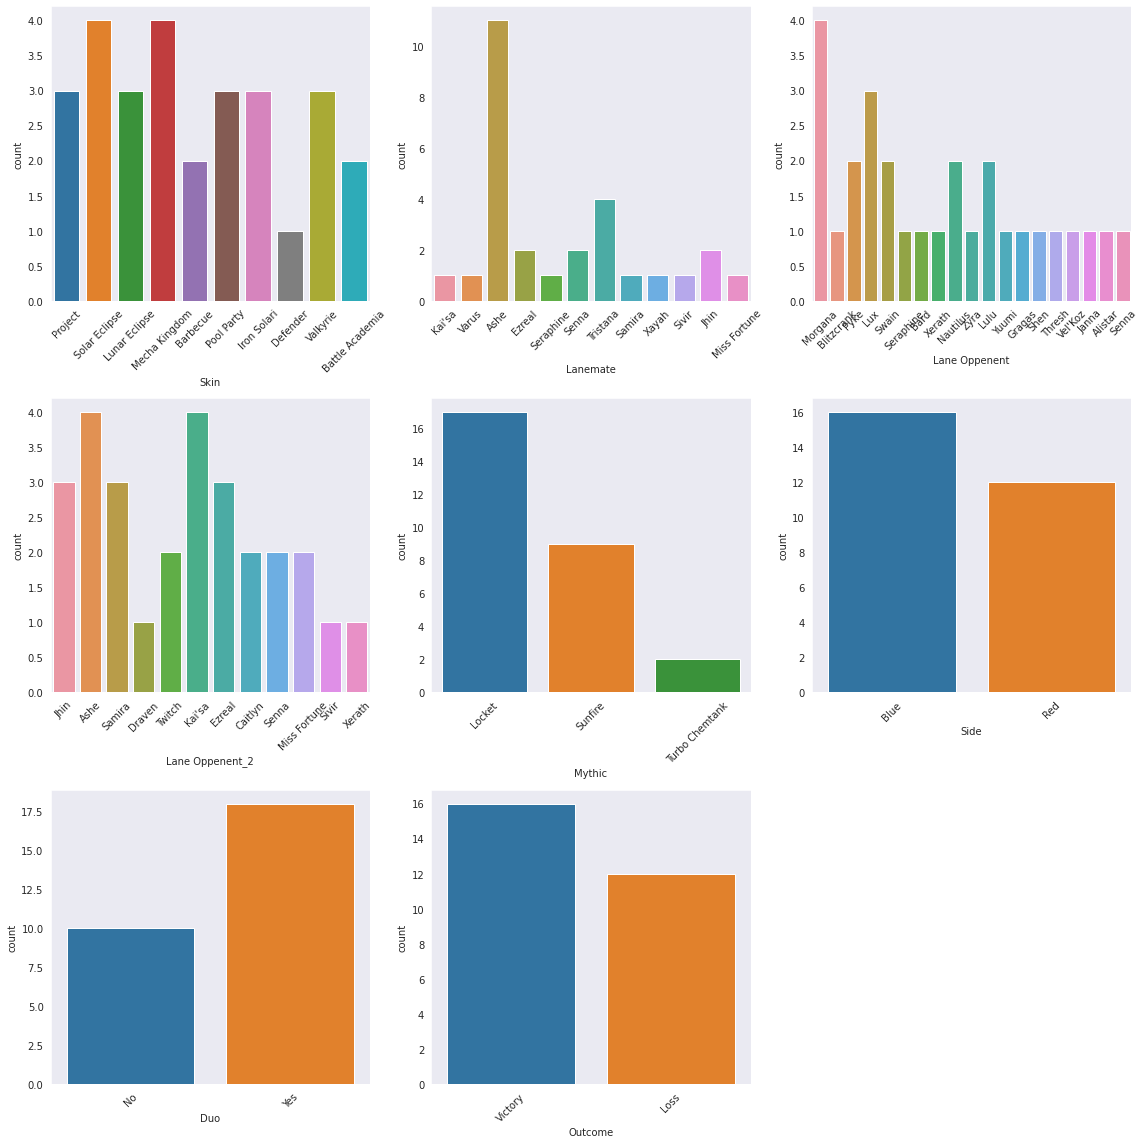

In [ ]:
i = 1
plt.figure(figsize=(16, 16))
for cat in cat_col:
  plt.subplot(3,3,i)
  sns.countplot(x=cat, data=leo_df)
  plt.xticks(rotation = 45)
  i = i + 1
  plt.tight_layout()

plt.show()

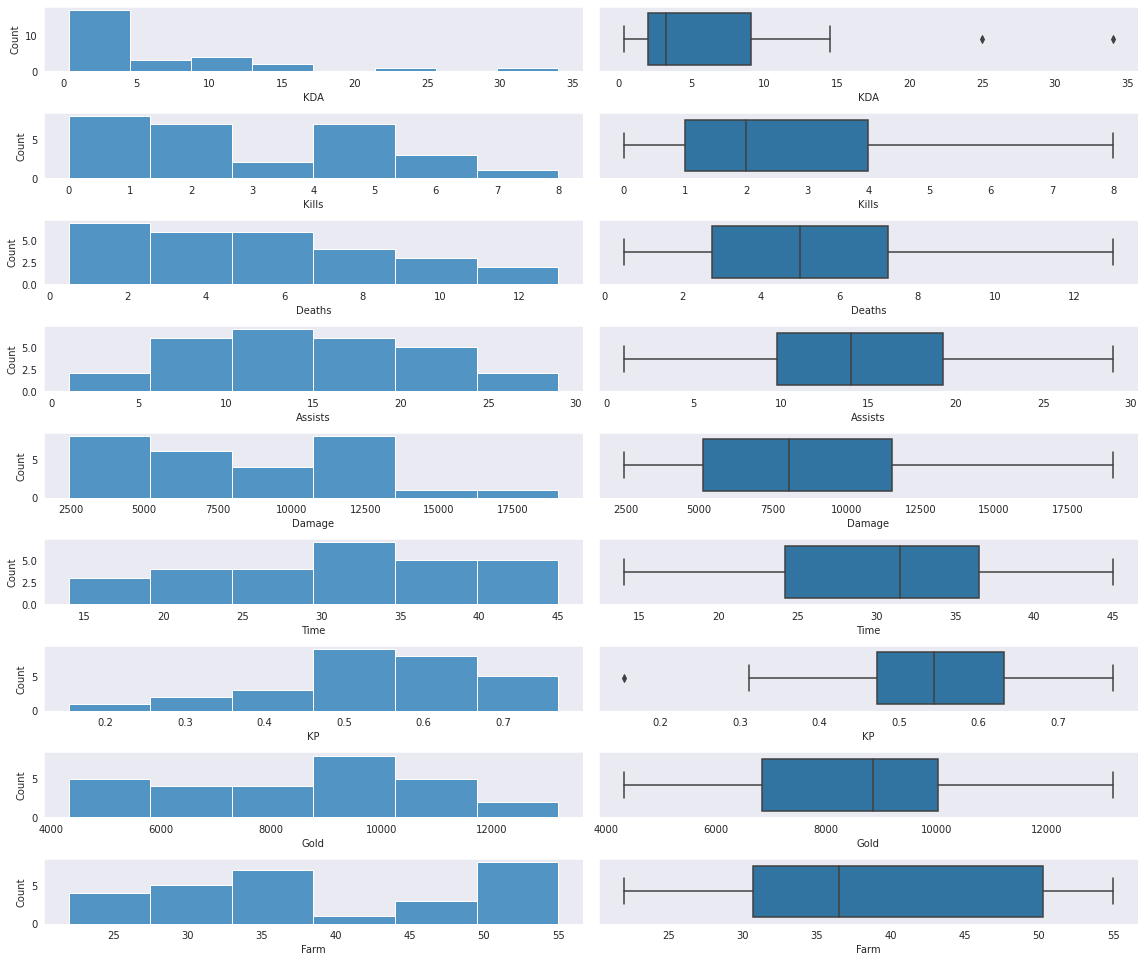

In [ ]:
i = 1
plt.figure(figsize=(16,16))
for cont in cont_col:
  plt.subplot(11,2, i)
  sns.histplot(leo_df[cont])
  i = i + 1
  
  plt.subplot(11,2,i)
  sns.boxplot(x=leo_df[cont])
  i = i + 1
  plt.tight_layout()

plt.show()

In [ ]:
y = leo_df['Outcome']
X = leo_df.drop('Outcome', axis=1)
X = pd.get_dummies(X)
X.head()

,Patch,Kills,Deaths,Assists,KDA,KP,Total Kills,Damage,Gold,Time,Farm,Skin_Barbecue,Skin_Battle Academia,Skin_Defender,Skin_Iron Solari,Skin_Lunar Eclipse,Skin_Mecha Kingdom,Skin_Pool Party,Skin_Project,Skin_Solar Eclipse,Skin_Valkyrie,Role_Support,Lanemate_Ashe,Lanemate_Ezreal,Lanemate_Jhin,Lanemate_Kai'sa,Lanemate_Miss Fortune,Lanemate_Samira,Lanemate_Senna,Lanemate_Seraphine,Lanemate_Sivir,Lanemate_Tristana,Lanemate_Varus,Lanemate_Xayah,Lane Oppenent_Alistar,Lane Oppenent_Bard,Lane Oppenent_Blitzcrank,Lane Oppenent_Gragas,Lane Oppenent_Janna,Lane Oppenent_Lulu,Lane Oppenent_Lux,Lane Oppenent_Morgana,Lane Oppenent_Nautilus,Lane Oppenent_Pyke,Lane Oppenent_Senna,Lane Oppenent_Seraphine,Lane Oppenent_Shen,Lane Oppenent_Swain,Lane Oppenent_Thresh,Lane Oppenent_Vel'Koz,Lane Oppenent_Xerath,Lane Oppenent_Yuumi,Lane Oppenent_Zyra,Lane Oppenent_2_Ashe,Lane Oppenent_2_Caitlyn,Lane Oppenent_2_Draven,Lane Oppenent_2_Ezreal,Lane Oppenent_2_Jhin,Lane Oppenent_2_Kai'sa,Lane Oppenent_2_Miss Fortune,Lane Oppenent_2_Samira,Lane Oppenent_2_Senna,Lane Oppenent_2_Sivir,Lane Oppenent_2_Twitch,Lane Oppenent_2_Xerath,Mythic_Locket,Mythic_Sunfire,Mythic_Turbo Chemtank,Side_Blue,Side_Red,Duo_No,Duo_Yes
0,11.1,2,4.0,18,5.00,0.513,39,7912,8743,32,24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,11.1,4,10.0,17,2.10,0.583,36,12005,9875,38,51,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,11.1,2,1.0,9,11.00,0.500,22,2694,5424,17,32,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4,11.1,2,4.0,11,3.25,0.382,34,7001,8537,28,55,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
5,11.1,4,2.0,23,13.50,0.614,44,11042,8890,25,34,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=137)

models = {
    'RF': RandomForestClassifier(n_estimators=100, criterion='entropy'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': svm.SVC(),
    'NB': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators = 100, max_depth=4, learning_rate=0.05, criterion='mae')
}


for name, model in models.items():
    model = model.fit(X_train, y_train)
    model_predict= model.predict(X_test)
    print('Model : {} Accuracy : {}'.format(name, accuracy_score(y_test, model_predict)))

Model : RF Accuracy : 0.8888888888888888
Model : KNN Accuracy : 0.3333333333333333
Model : SVM Accuracy : 0.6666666666666666
Model : NB Accuracy : 0.5555555555555556
Model : Gradient Boosting Accuracy : 0.7777777777777778
